In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Load data
data_train = pd.read_csv('data/swissmetro_clean_train.csv')
data_test = pd.read_csv('data/swissmetro_clean_test.csv')

# Set variables
Xvars = ['TRAIN_COST','SM_COST','CAR_COST','TRAIN_TT','SM_TT','CAR_TT','TRAIN_HE','SM_HE']
X_train = data_train[Xvars]
X_test = data_test[Xvars]
X = pd.concat([X_train,X_test],axis=0,ignore_index=True) * 100

y_train = data_train['CHOICE']
y_test = data_test['CHOICE']
y = pd.concat([y_train,y_test],axis=0,ignore_index=True)

In [11]:
# Create descriptives table
X_describe = X.describe()
X_describe = X_describe.append(pd.Series(np.median(X,axis=0),index=X_describe.columns,name='median'))
X_describe.to_excel('tables/summary_X.xlsx')
X_describe

/tmp/ipykernel_30852/700077374.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_describe = X_describe.append(pd.Series(np.median(X,axis=0),index=X_describe.columns,name='median'))


,TRAIN_COST,SM_COST,CAR_COST,TRAIN_TT,SM_TT,CAR_TT,TRAIN_HE,SM_HE
count,9036.000000,9036.000000,9036.000000,9036.000000,9036.000000,9036.000000,9036.000000,9036.000000
mean,91.266047,110.193780,93.433488,173.691124,91.381363,146.881363,70.039841,20.048694
std,65.512432,80.473013,47.480736,78.584558,55.764270,77.165300,37.423947,8.163917
min,0.000000,0.000000,8.000000,31.000000,8.000000,32.000000,30.000000,10.000000
25%,48.000000,57.000000,58.000000,115.750000,56.750000,91.000000,30.000000,10.000000
50%,81.000000,97.000000,84.000000,167.000000,81.000000,136.000000,60.000000,20.000000
75%,121.000000,144.000000,123.000000,217.000000,114.000000,190.000000,120.000000,30.000000
max,576.000000,768.000000,520.000000,1049.000000,796.000000,1560.000000,120.000000,30.000000
median,81.000000,97.000000,84.000000,167.000000,81.000000,136.000000,60.000000,20.000000


In [43]:
y_describe = y.value_counts()
y_describe.rename({1:'Train',2:'Swissmetro',3:'Car'},inplace=True)
y_describe = y_describe.loc[['Train','Swissmetro','Car']]
y_describe

Train          779
Swissmetro    5177
Car           3080
Name: CHOICE, dtype: int64

In [80]:
y.value_counts(normalize=True)

2    0.572931
3    0.340859
1    0.086211
Name: CHOICE, dtype: float64

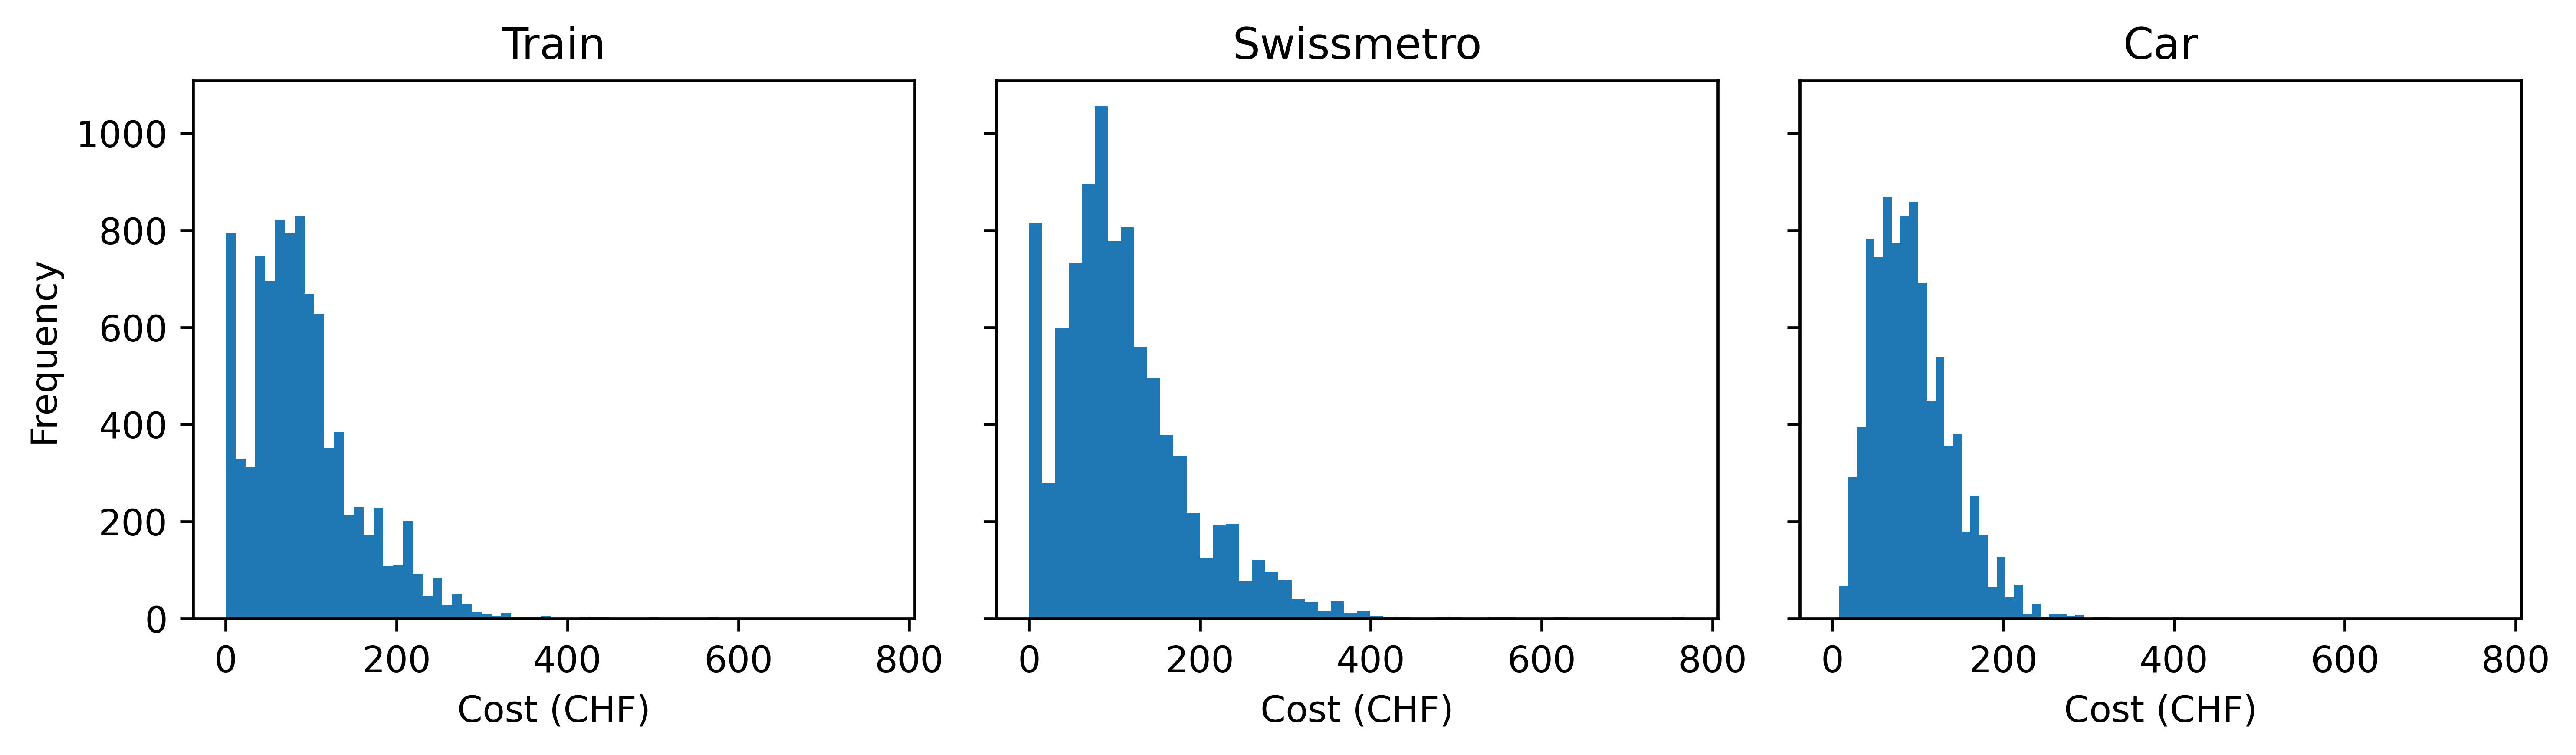

In [6]:
X_COST = X[['TRAIN_COST','SM_COST','CAR_COST']]
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,3),sharex=True,sharey=True,dpi=600)
ax1.hist(X_COST.iloc[:,0],bins=50)
ax1.title.set_text('Train')
ax1.set_xlabel('Cost (CHF)')
ax1.set_ylabel('Frequency')
ax2.hist(X_COST.iloc[:,1],bins=50)
ax2.title.set_text('Swissmetro')
ax2.set_xlabel('Cost (CHF)')
ax3.hist(X_COST.iloc[:,2],bins=50)
ax3.title.set_text('Car')
ax3.set_xlabel('Cost (CHF)')
plt.tight_layout()
# plt.savefig('figs/cost_hist.png')
plt.show()

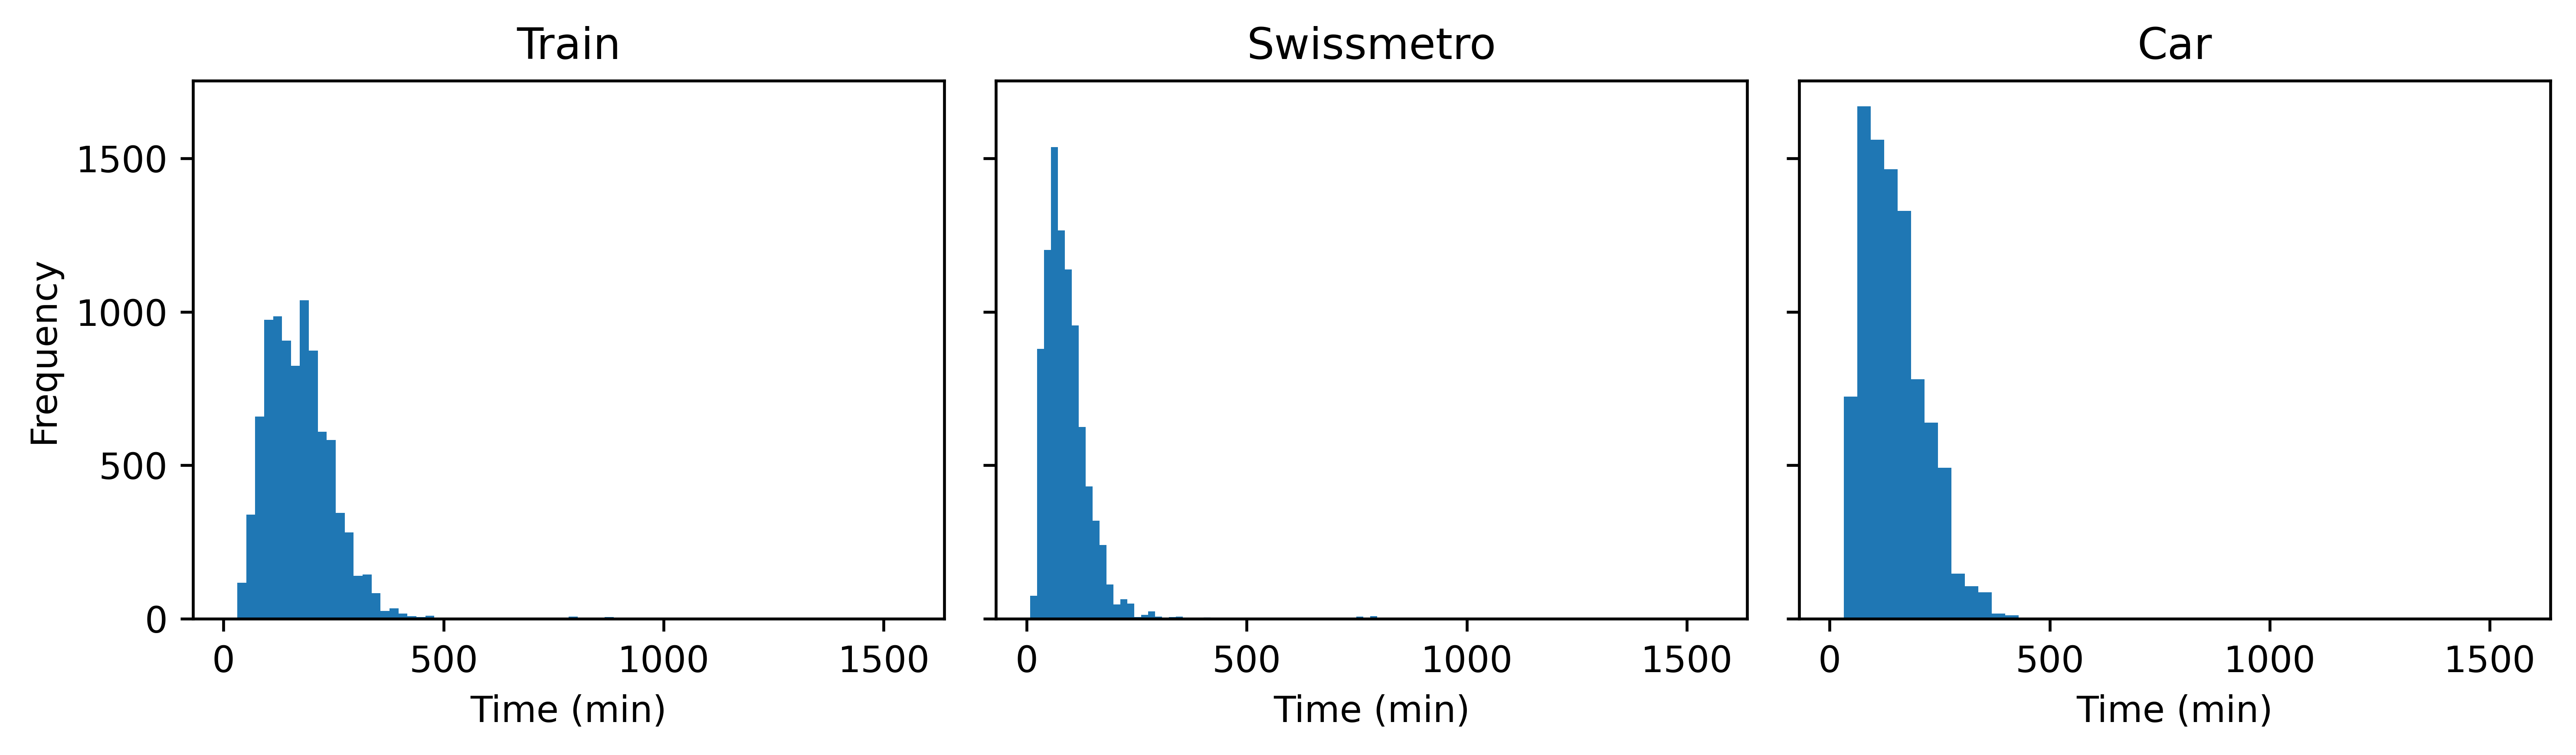

In [7]:
X_TT = X[['TRAIN_TT','SM_TT','CAR_TT']]
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,3),sharex=True,sharey=True,dpi=600)
ax1.hist(X_TT.iloc[:,0],bins=50)
ax1.title.set_text('Train')
ax1.set_xlabel('Time (min)')
ax1.set_ylabel('Frequency')
ax2.hist(X_TT.iloc[:,1],bins=50)
ax2.title.set_text('Swissmetro')
ax2.set_xlabel('Time (min)')
ax3.hist(X_TT.iloc[:,2],bins=50)
ax3.title.set_text('Car')
ax3.set_xlabel('Time (min)')
plt.tight_layout()
# plt.savefig('figs/time_hist.png')
plt.show()